<a href="https://colab.research.google.com/github/rodrigorissettoterra/Machine-Learning/blob/main/Machine_Learning_Quanto_custa%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto: Quanto custa?

**Objetivo:** Verificar, segundo a base dados fornecida, como acontece a precificação de projetos, em um site de serviços.

**Link da base de dados:** https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv

##Importando as bibliotecas necessárias

In [92]:
!pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [93]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

##Importando a base de dados

In [94]:
url= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(url)

###Verificando a base de dados

In [95]:
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


###Renomeando colunas (tradução)

In [96]:
mapa = {
    'unfinished': 'nao_finalizado',
    'expected_hours': 'horas_esperadas',
    'price': 'preco'
}
dados = dados.rename(columns = mapa)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


###Criando uma coluna para projetos finalizados

In [97]:
trocar = {
    0:1,
    1:0
}
dados['finalizado'] = dados.nao_finalizado.map(trocar)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


##Plotando algumas relações

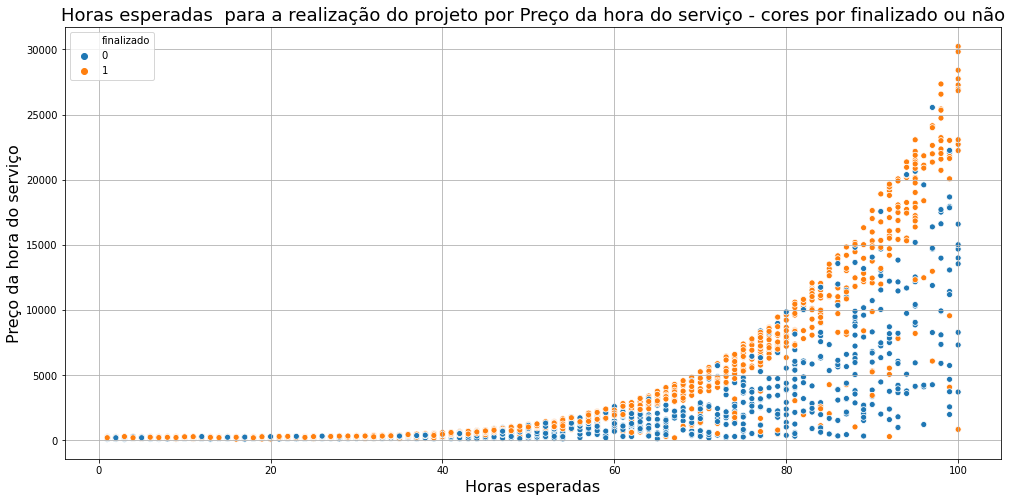

In [98]:
fig = plt.figure(figsize = (13,6))
eixo = fig.add_axes([0,0,1,1])
sns.scatterplot(x = 'horas_esperadas', y='preco', hue = 'finalizado', data = dados)
plt.xlabel('Horas esperadas', fontsize = 16)
plt.ylabel('Preço da hora do serviço', fontsize = 16)
ax = plt.title('Horas esperadas  para a realização do projeto por Preço da hora do serviço - cores por finalizado ou não', fontsize = 18)
eixo.grid(True)


##Dividindo o conjunto de dados entre treino e teste

In [99]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

SEED = 5
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 1617 elementos e testaremos com 540 elementos


##Criando um modelo

In [100]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

##Testando o modelo criado

In [101]:
previsoes = modelo.predict(teste_x)
acuracia = round(accuracy_score(teste_y, previsoes) * 100,3)
print('Taxa de acerto: ', acuracia,'%')

Taxa de acerto:  47.407 %


##Criando uma base de dados de teste (para comparação)

In [102]:
previsoes_de_base = np.ones(540)

In [103]:
print('Taxa de acerto de baseline: ', round(accuracy_score(teste_y, previsoes_de_base)*100,3),'%')

Taxa de acerto de baseline:  52.593 %


##Visualizando os dados

In [104]:
teste_x

,horas_esperadas,preco
562,36,264
85,100,7327
507,92,7852
1624,95,17058
822,45,281
...,...,...
102,82,1973
1012,73,6464
484,77,683
1079,62,2277


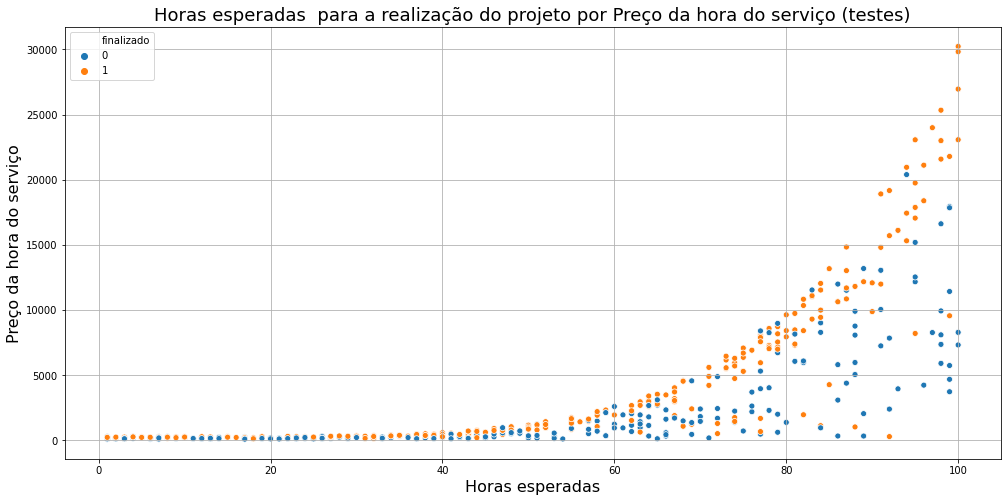

In [105]:
fig = plt.figure(figsize = (13,6))
eixo = fig.add_axes([0,0,1,1])
sns.scatterplot(x = 'horas_esperadas', y='preco', hue = teste_y, data = teste_x)
plt.xlabel('Horas esperadas', fontsize = 16)
plt.ylabel('Preço da hora do serviço', fontsize = 16)
ax = plt.title('Horas esperadas  para a realização do projeto por Preço da hora do serviço (testes)', fontsize = 18)
eixo.grid(True)

##Entendendo o algoritmo

In [106]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print('x mínimo =',x_min, '\nx máximo =',x_max, '\ny mínimo =',y_min, '\ny máximo =',y_max)

x mínimo = 1 
x máximo = 100 
y mínimo = 100 
y máximo = 30223


###Criando pares de coordenadas X e Y

In [107]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[(xx.ravel(), yy.ravel())]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

###Testando o modelo criado com as coordenadas geradas

In [108]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

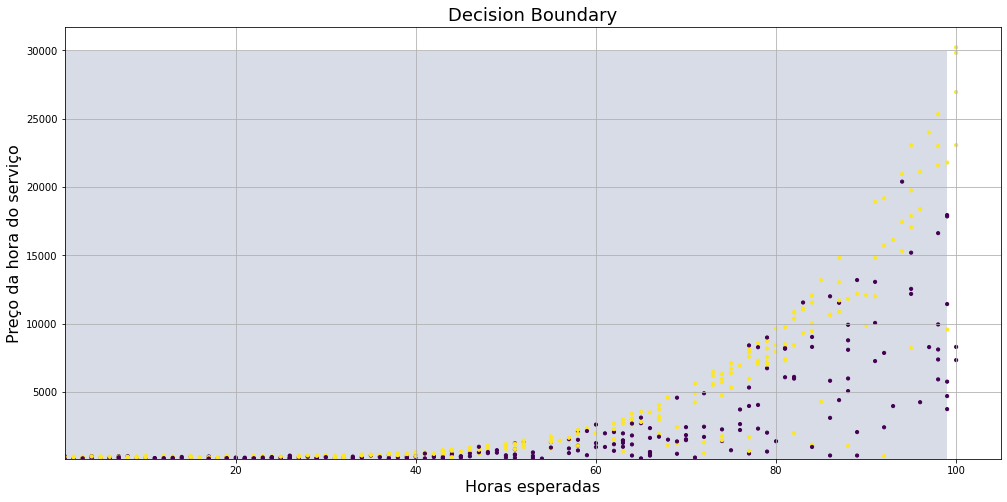

In [109]:
fig = plt.figure(figsize = (13,6))
eixo = fig.add_axes([0,0,1,1])
plt.contourf(xx, yy, Z, alpha = 0.2)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=10)
plt.xlabel('Horas esperadas', fontsize = 16)
plt.ylabel('Preço da hora do serviço', fontsize = 16)
ax = plt.title('Decision Boundary', fontsize = 18)
eixo.grid(True)

##Utilizando um modelo mais livre

In [110]:
SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 1617 elementos e testaremos com 540 elementos


In [111]:
modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

print('Taxa de acerto de baseline: ', round(accuracy_score(teste_y, previsoes_de_base)*100,3),'%')

Taxa de acerto de baseline:  52.593 %


###Entendendo o algoritmo

In [112]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print('x mínimo =',x_min, '\nx máximo =',x_max, '\ny mínimo =',y_min, '\ny máximo =',y_max)

x mínimo = 1 
x máximo = 100 
y mínimo = 100 
y máximo = 30223


In [113]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[(xx.ravel(), yy.ravel())]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [114]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

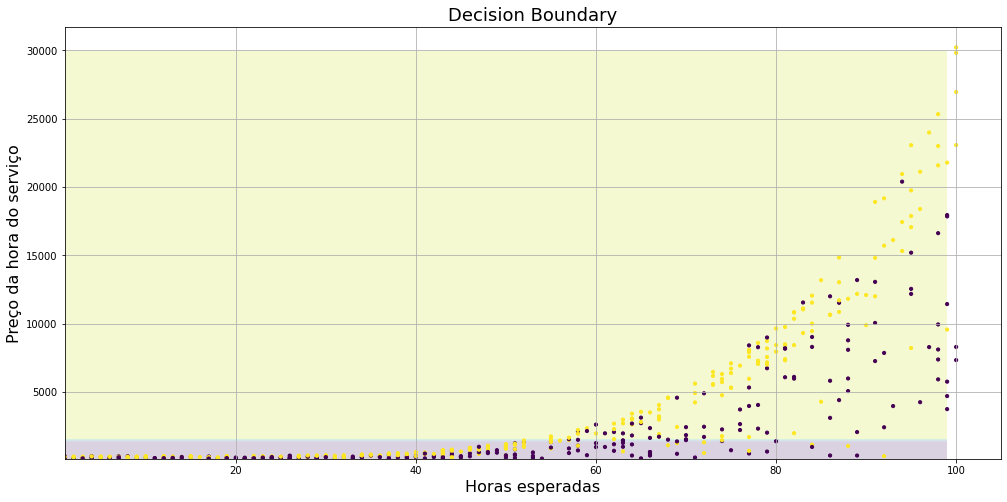

In [115]:
fig = plt.figure(figsize = (13,6))
eixo = fig.add_axes([0,0,1,1])
plt.contourf(xx, yy, Z, alpha = 0.2)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=10)
plt.xlabel('Horas esperadas', fontsize = 16)
plt.ylabel('Preço da hora do serviço', fontsize = 16)
ax = plt.title('Decision Boundary', fontsize = 18)
eixo.grid(True)

###Padronizando a faixa de valores

In [116]:
SEED = 1
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
print('Taxa de acerto de baseline: ', round(accuracy_score(teste_y, previsoes)*100,3),'%')

Treinaremos com 1617 elementos e testaremos com 540 elementos
Taxa de acerto de baseline:  68.333 %


In [117]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

print('x mínimo =',x_min, '\nx máximo =',x_max, '\ny mínimo =',y_min, '\ny máximo =',y_max)

x mínimo = -1.751884102414947 
x máximo = 1.7010870344728746 
y mínimo = -0.6007721077125833 
y máximo = 4.23445304365155


In [118]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[(xx.ravel(), yy.ravel())]
pontos

array([[-1.7518841 , -0.60077211],
       [-1.71735439, -0.60077211],
       [-1.68282468, -0.60077211],
       ...,
       [ 1.5974979 ,  4.18610079],
       [ 1.63202761,  4.18610079],
       [ 1.66655732,  4.18610079]])

In [119]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

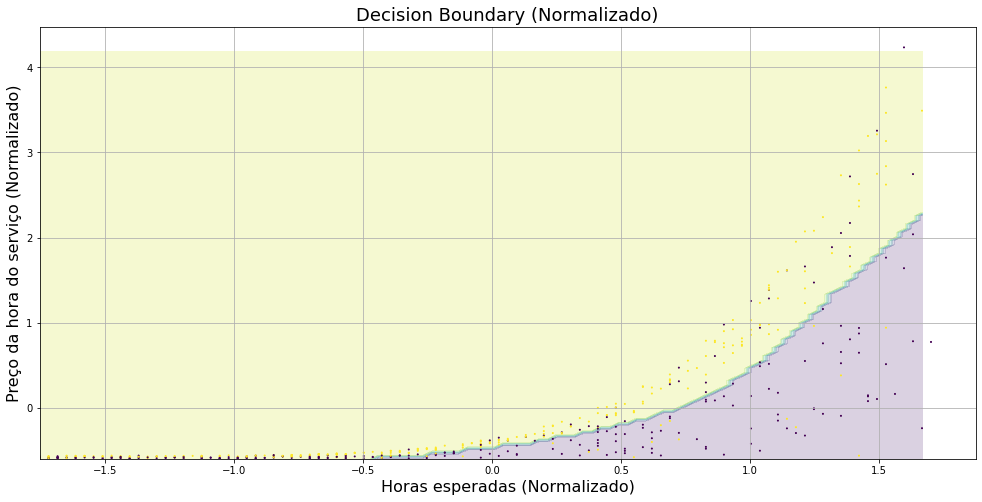

In [120]:
# DECISION BOUNDARY

fig = plt.figure(figsize = (13,6))
eixo = fig.add_axes([0,0,1,1])
plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(data_x, data_y, c=teste_y, s=1)
plt.xlabel('Horas esperadas (Normalizado)', fontsize = 16)
plt.ylabel('Preço da hora do serviço (Normalizado)', fontsize = 16)
ax = plt.title('Decision Boundary (Normalizado)', fontsize = 18)
eixo.grid(True)